In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

pd.set_option('display.max_colwidth', None)

# Read and preprocess data

In [2]:
raw_provinces = [ { "nama": "ACEH", "id": 100054, "kode": "11", "tingkat": 1 }, { "nama": "BALI", "id": 191103, "kode": "51", "tingkat": 1 }, { "nama": "BANTEN", "id": 191100, "kode": "36", "tingkat": 1 }, { "nama": "BENGKULU", "id": 191092, "kode": "17", "tingkat": 1 }, { "nama": "DAERAH ISTIMEWA YOGYAKARTA", "id": 191098, "kode": "34", "tingkat": 1 }, { "nama": "DKI JAKARTA", "id": 191095, "kode": "31", "tingkat": 1 }, { "nama": "GORONTALO", "id": 191053, "kode": "75", "tingkat": 1 }, { "nama": "JAMBI", "id": 191089, "kode": "15", "tingkat": 1 }, { "nama": "JAWA BARAT", "id": 191096, "kode": "32", "tingkat": 1 }, { "nama": "JAWA TENGAH", "id": 191097, "kode": "33", "tingkat": 1 }, { "nama": "JAWA TIMUR", "id": 191099, "kode": "35", "tingkat": 1 }, { "nama": "KALIMANTAN BARAT", "id": 191101, "kode": "61", "tingkat": 1 }, { "nama": "KALIMANTAN SELATAN", "id": 191106, "kode": "63", "tingkat": 1 }, { "nama": "KALIMANTAN TENGAH", "id": 191102, "kode": "62", "tingkat": 1 }, { "nama": "KALIMANTAN TIMUR", "id": 191107, "kode": "64", "tingkat": 1 }, { "nama": "KALIMANTAN UTARA", "id": 191108, "kode": "65", "tingkat": 1 }, { "nama": "KEPULAUAN BANGKA BELITUNG", "id": 191094, "kode": "19", "tingkat": 1 }, { "nama": "KEPULAUAN RIAU", "id": 191091, "kode": "21", "tingkat": 1 }, { "nama": "LAMPUNG", "id": 191093, "kode": "18", "tingkat": 1 }, { "nama": "Luar Negeri", "id": 200001, "kode": "99", "tingkat": 1 }, { "nama": "MALUKU", "id": 191115, "kode": "81", "tingkat": 1 }, { "nama": "MALUKU UTARA", "id": 191116, "kode": "82", "tingkat": 1 }, { "nama": "NUSA TENGGARA BARAT", "id": 191104, "kode": "52", "tingkat": 1 }, { "nama": "NUSA TENGGARA TIMUR", "id": 191105, "kode": "53", "tingkat": 1 }, { "nama": "P A P U A", "id": 191117, "kode": "91", "tingkat": 1 }, { "nama": "PAPUA BARAT", "id": 191118, "kode": "92", "tingkat": 1 }, { "nama": "PAPUA BARAT DAYA", "id": 191121, "kode": "96", "tingkat": 1 }, { "nama": "PAPUA PEGUNUNGAN", "id": 191120, "kode": "95", "tingkat": 1 }, { "nama": "PAPUA SELATAN", "id": 191114, "kode": "93", "tingkat": 1 }, { "nama": "PAPUA TENGAH", "id": 191119, "kode": "94", "tingkat": 1 }, { "nama": "RIAU", "id": 191088, "kode": "14", "tingkat": 1 }, { "nama": "SULAWESI BARAT", "id": 191113, "kode": "76", "tingkat": 1 }, { "nama": "SULAWESI SELATAN", "id": 191111, "kode": "73", "tingkat": 1 }, { "nama": "SULAWESI TENGAH", "id": 191110, "kode": "72", "tingkat": 1 }, { "nama": "SULAWESI TENGGARA", "id": 191112, "kode": "74", "tingkat": 1 }, { "nama": "SULAWESI UTARA", "id": 191109, "kode": "71", "tingkat": 1 }, { "nama": "SUMATERA BARAT", "id": 191087, "kode": "13", "tingkat": 1 }, { "nama": "SUMATERA SELATAN", "id": 191090, "kode": "16", "tingkat": 1 }, { "nama": "SUMATERA UTARA", "id": 191086, "kode": "12", "tingkat": 1 }]

provinces = {}
for x in raw_provinces:
    provinces[x['kode']] = x['nama']

In [3]:
def read_data(filename):
    data = []
    with open(filename, 'r') as f:
        for step, x in enumerate(f):
            x = json.loads(x)
            paslon_1 = np.nan
            paslon_2 = np.nan
            paslon_3 = np.nan

            if x['data']['chart'] is not None and '100025' in x['data']['chart']:
                paslon_1 = x['data']['chart']['100025']

            if x['data']['chart'] is not None and '100026' in x['data']['chart']:
                paslon_2 = x['data']['chart']['100026']

            if x['data']['chart'] is not None and '100027' in x['data']['chart']:
                paslon_3 = x['data']['chart']['100027']


            suara_sah = np.nan
            suara_total = np.nan
            pemilih_dpt_j = np.nan
            pemilih_dpt_l = np.nan
            pemilih_dpt_p = np.nan
            pengguna_dpt_j = np.nan
            pengguna_dpt_l = np.nan
            pengguna_dpt_p = np.nan
            pengguna_dptb_j = np.nan
            pengguna_dptb_l = np.nan
            pengguna_dptb_p = np.nan
            suara_tidak_sah = np.nan
            pengguna_total_j = np.nan
            pengguna_total_l = np.nan
            pengguna_total_p = np.nan
            pengguna_non_dpt_j = np.nan
            pengguna_non_dpt_l = np.nan
            pengguna_non_dpt_p = np.nan

            if x['data']['administrasi'] is not None:
                suara_sah = x['data']['administrasi']['suara_sah']
                suara_total = x['data']['administrasi']['suara_total']
                pemilih_dpt_j = x['data']['administrasi']['pemilih_dpt_j']
                pemilih_dpt_l = x['data']['administrasi']['pemilih_dpt_l']
                pemilih_dpt_p = x['data']['administrasi']['pemilih_dpt_p']
                pengguna_dpt_j = x['data']['administrasi']['pengguna_dpt_j']
                pengguna_dpt_l = x['data']['administrasi']['pengguna_dpt_l']
                pengguna_dpt_p = x['data']['administrasi']['pengguna_dpt_p']
                pengguna_dptb_j = x['data']['administrasi']['pengguna_dptb_j']
                pengguna_dptb_l = x['data']['administrasi']['pengguna_dptb_l']
                pengguna_dptb_p = x['data']['administrasi']['pengguna_dptb_p']
                suara_tidak_sah = x['data']['administrasi']['suara_tidak_sah']
                pengguna_total_j = x['data']['administrasi']['pengguna_total_j']
                pengguna_total_l = x['data']['administrasi']['pengguna_total_l']
                pengguna_total_p = x['data']['administrasi']['pengguna_total_p']
                pengguna_non_dpt_j = x['data']['administrasi']['pengguna_non_dpt_j']
                pengguna_non_dpt_l = x['data']['administrasi']['pengguna_non_dpt_l']
                pengguna_non_dpt_p = x['data']['administrasi']['pengguna_non_dpt_p']

            status_suara = x['data']['status_suara']
            status_admin = x['data']['status_adm']
            
            
            data.append({
                'url': x['url'],
                'paslon_1': paslon_1,
                'paslon_2': paslon_2,
                'paslon_3': paslon_3,
                'suara_sah': suara_sah,
                'suara_total': suara_total,
                'pemilih_dpt_j': pemilih_dpt_j,
                'pemilih_dpt_l': pemilih_dpt_l,
                'pemilih_dpt_p': pemilih_dpt_p,
                'pengguna_dpt_j': pengguna_dpt_j,
                'pengguna_dpt_l': pengguna_dpt_l,
                'pengguna_dpt_p': pengguna_dpt_p,
                'pengguna_dptb_j': pengguna_dptb_j,
                'pengguna_dptb_l': pengguna_dptb_l,
                'pengguna_dptb_p': pengguna_dptb_p,
                'suara_tidak_sah': suara_tidak_sah,
                'pengguna_total_j': pengguna_total_j,
                'pengguna_total_l': pengguna_total_l,
                'pengguna_total_p': pengguna_total_p,
                'pengguna_non_dpt_j': pengguna_non_dpt_j,
                'pengguna_non_dpt_l': pengguna_non_dpt_l,
                'pengguna_non_dpt_p': pengguna_non_dpt_p,
                'status_suara': status_suara,
                'status_admin': status_admin,  
            })
    return data


data_18 = read_data('../raw_district_counts_2_20_2024.json')
data_18_df = pd.DataFrame(data_18)
data_20 = read_data('../raw_district_counts_2_21_2024.json')
data_20_df = pd.DataFrame(data_20)

In [4]:
def is_data_inputted(x):
    check_na = x.isna()
    if check_na['paslon_1'] or check_na['paslon_2'] or check_na['paslon_3']:
        return False
    return True


def is_greater_than_dpt(x):
    if x['is_data_inputted'] is False:
        return False

    check_na = x.isna()
    if check_na['suara_sah'] or check_na['suara_tidak_sah'] or check_na['suara_total']:
        return False

    candidate_cnt = x['paslon_1'] + x['paslon_2'] + x['paslon_3']

    return candidate_cnt > x['suara_sah']


def is_count_not_match(x):
    if x['is_data_inputted'] is False:
        return False

    check_na = x.isna()
    if check_na['suara_sah'] or check_na['suara_tidak_sah'] or check_na['suara_total']:
        return False

    return x['suara_sah'] + x['suara_tidak_sah'] != x['suara_total']

def get_province(x):
    province_code = x['url'].split("/")[6]
    return provinces[province_code]


def change_url(x):
    url = x['url'].replace('https://sirekap-obj-data.kpu.go.id/pemilu/hhcw/ppwp/','https://pemilu2024.kpu.go.id/pilpres/hitung-suara/')
    url = url.replace('.json', '')
    return url

    

data_18_df['is_data_inputted'] = data_18_df.apply(lambda x: is_data_inputted(x), axis=1)
data_18_df['is_greater_than_dpt'] = data_18_df.apply(lambda x: is_greater_than_dpt(x), axis=1)
data_18_df['is_count_not_match'] = data_18_df.apply(lambda x: is_count_not_match(x), axis=1)
data_18_df['province'] = data_18_df.apply(lambda x: get_province(x), axis=1)
data_18_df['url'] = data_18_df.apply(lambda x: change_url(x), axis=1)

data_20_df['is_data_inputted'] = data_20_df.apply(lambda x: is_data_inputted(x), axis=1)
data_20_df['is_greater_than_dpt'] = data_20_df.apply(lambda x: is_greater_than_dpt(x), axis=1)
data_20_df['is_count_not_match'] = data_20_df.apply(lambda x: is_count_not_match(x), axis=1)
data_20_df['province'] = data_20_df.apply(lambda x: get_province(x), axis=1)
data_20_df['url'] = data_20_df.apply(lambda x: change_url(x), axis=1)

# Statistik General data di KPU

In [5]:
print(f"Statistik data yang diambil 20 Februari 2024:")
print(f"Jumlah TPS yang sudah terinput: {data_18_df['is_data_inputted'].sum()/len(data_18_df):.2%} ({data_18_df['is_data_inputted'].sum()}\{len(data_18_df)})")

print(f"Statistik data yang diambil 21 Februari 2024:")
print(f"Jumlah TPS yang sudah terinput: {data_20_df['is_data_inputted'].sum()/len(data_20_df):.2%} ({data_20_df['is_data_inputted'].sum()}\{len(data_20_df)})")

Statistik data yang diambil 20 Februari 2024:
Jumlah TPS yang sudah terinput: 59.87% (492869\823236)
Statistik data yang diambil 21 Februari 2024:
Jumlah TPS yang sudah terinput: 64.93% (534528\823236)


# Persentase TPS yang memiliki jumlah suara paslon anomali

TPS anomali adalah TPS yang memiliki jumlah suara ketiga paslon > jumlah suara sah.

NB: Ada beberapa TPS yang tidak memiliki informasi jumlah suara sah. Untuk TPS tersebut, kita anggap tidak anomali

In [6]:
print(f"Statistik data yang diambil 20 Februari 2024:")
cnt_greater_than_dpt = data_18_df['is_greater_than_dpt'].sum()
cnt_inputted_data = data_18_df['is_data_inputted'].sum()
print(f"Jumlah TPS yang memiliki data anomali: {cnt_greater_than_dpt/cnt_inputted_data:.2%} ({cnt_greater_than_dpt}\{cnt_inputted_data})")

print(f"Statistik data yang diambil 21 Februari 2024:")
cnt_greater_than_dpt = data_20_df['is_greater_than_dpt'].sum()
cnt_inputted_data = data_20_df['is_data_inputted'].sum()
print(f"Jumlah TPS yang memiliki data anomali: {cnt_greater_than_dpt/cnt_inputted_data:.2%} ({cnt_greater_than_dpt}\{cnt_inputted_data})")

Statistik data yang diambil 20 Februari 2024:
Jumlah TPS yang memiliki data anomali: 1.33% (6558\492869)
Statistik data yang diambil 21 Februari 2024:
Jumlah TPS yang memiliki data anomali: 1.45% (7728\534528)


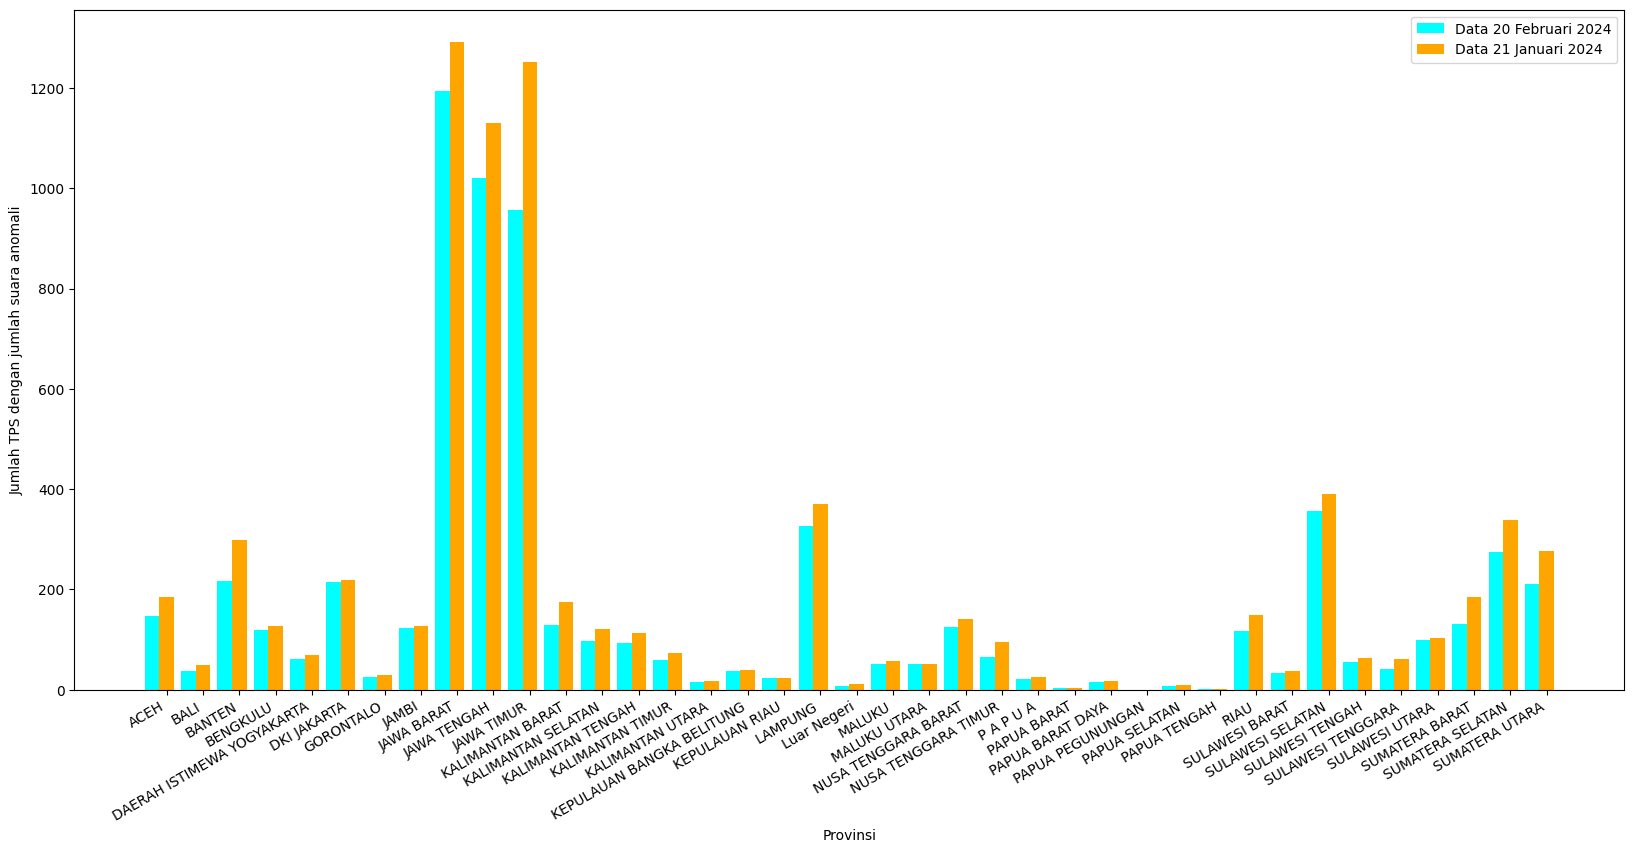

In [7]:
data_before = data_18_df[data_18_df['is_greater_than_dpt'] == True]
data_after = data_20_df[data_20_df['is_greater_than_dpt'] == True]

province_list = [provinces[key] for key in provinces]
y_before = [len(data_before[data_before['province'] == province]) for province in province_list]
y_after = [len(data_after[data_after['province'] == province]) for province in province_list]
x = np.arange(len(province_list))

fig, ax = plt.subplots(1, figsize = (20, 10))
fig.autofmt_xdate()
plt.bar(x-0.4, y_before, 0.4, color='cyan') 
plt.bar(x, y_after, 0.4, color='orange') 
plt.xticks(x, province_list) 
plt.xlabel("Provinsi") 
plt.ylabel("Jumlah TPS dengan jumlah suara anomali") 
plt.legend(["Data 20 Februari 2024", "Data 21 Januari 2024"]) 
plt.show() 

In [8]:
print("Contoh TPS dengan jumlah suara paslon anomali")
data_20_df[data_20_df['is_greater_than_dpt'] == True]

Contoh TPS dengan jumlah suara paslon anomali


,url,paslon_1,paslon_2,paslon_3,suara_sah,suara_total,pemilih_dpt_j,pemilih_dpt_l,pemilih_dpt_p,pengguna_dpt_j,...,pengguna_total_p,pengguna_non_dpt_j,pengguna_non_dpt_l,pengguna_non_dpt_p,status_suara,status_admin,is_data_inputted,is_greater_than_dpt,is_count_not_match,province
35,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1105/110507/1105072017/1105072017001,91.0,65.0,3.0,0.0,0.0,180.0,93.0,87.0,161.0,...,79.0,0.0,0.0,0.0,True,True,True,True,False,ACEH
190,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1105/110501/1105012017/1105012017004,167.0,43.0,12.0,217.0,222.0,284.0,131.0,153.0,227.0,...,127.0,0.0,0.0,0.0,True,True,True,True,False,ACEH
358,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1105/110509/1105092024/1105092024001,101.0,84.0,3.0,187.0,188.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,True,True,True,True,False,ACEH
393,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1105/110508/1105082012/1105082012002,165.0,21.0,1.0,184.0,187.0,219.0,106.0,113.0,187.0,...,101.0,0.0,0.0,0.0,True,True,True,True,False,ACEH
412,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1105/110508/1105082025/1105082025002,127.0,42.0,4.0,163.0,165.0,176.0,87.0,89.0,165.0,...,84.0,0.0,0.0,0.0,True,True,True,True,False,ACEH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822559,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1212/121208/1212081009/1212081009003,6.0,165.0,21.0,191.0,192.0,234.0,114.0,120.0,179.0,...,99.0,9.0,3.0,6.0,True,True,True,True,False,SUMATERA UTARA
822673,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1212/121201/1212012011/1212012011001,7.0,162.0,44.0,0.0,0.0,204.0,98.0,106.0,204.0,...,111.0,2.0,1.0,1.0,True,True,True,True,False,SUMATERA UTARA
822997,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1212/121224/1212242006/1212242006006,14.0,271.0,24.0,273.0,274.0,221.0,117.0,104.0,159.0,...,82.0,15.0,6.0,9.0,True,True,True,True,False,SUMATERA UTARA
823218,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1212/121210/1212102005/1212102005002,89.0,89.0,39.0,129.0,131.0,192.0,95.0,97.0,128.0,...,63.0,1.0,0.0,1.0,True,True,True,True,False,SUMATERA UTARA


# Persentase TPS yang jumlah suara total TIDAK SAMA dengan jumlah suara sah + jumlah suara tidak sah

In [9]:
print(f"Statistik data yang diambil 20 Februari 2024:")
cnt_count_not_match = data_18_df['is_count_not_match'].sum()
cnt_inputted_data = data_18_df['is_data_inputted'].sum()
print(f"Jumlah TPS yang memiliki jumlah suara tidak sama: {cnt_count_not_match/cnt_inputted_data:.2%} ({cnt_count_not_match}\{cnt_inputted_data})")

print(f"Statistik data yang diambil 21 Februari 2024:")
cnt_count_not_match = data_20_df['is_count_not_match'].sum()
cnt_inputted_data = data_20_df['is_data_inputted'].sum()
print(f"Jumlah TPS yang memiliki jumlah suara tidak sama: {cnt_count_not_match/cnt_inputted_data:.2%} ({cnt_count_not_match}\{cnt_inputted_data})")

Statistik data yang diambil 20 Februari 2024:
Jumlah TPS yang memiliki jumlah suara tidak sama: 0.56% (2743\492869)
Statistik data yang diambil 21 Februari 2024:
Jumlah TPS yang memiliki jumlah suara tidak sama: 0.64% (3430\534528)


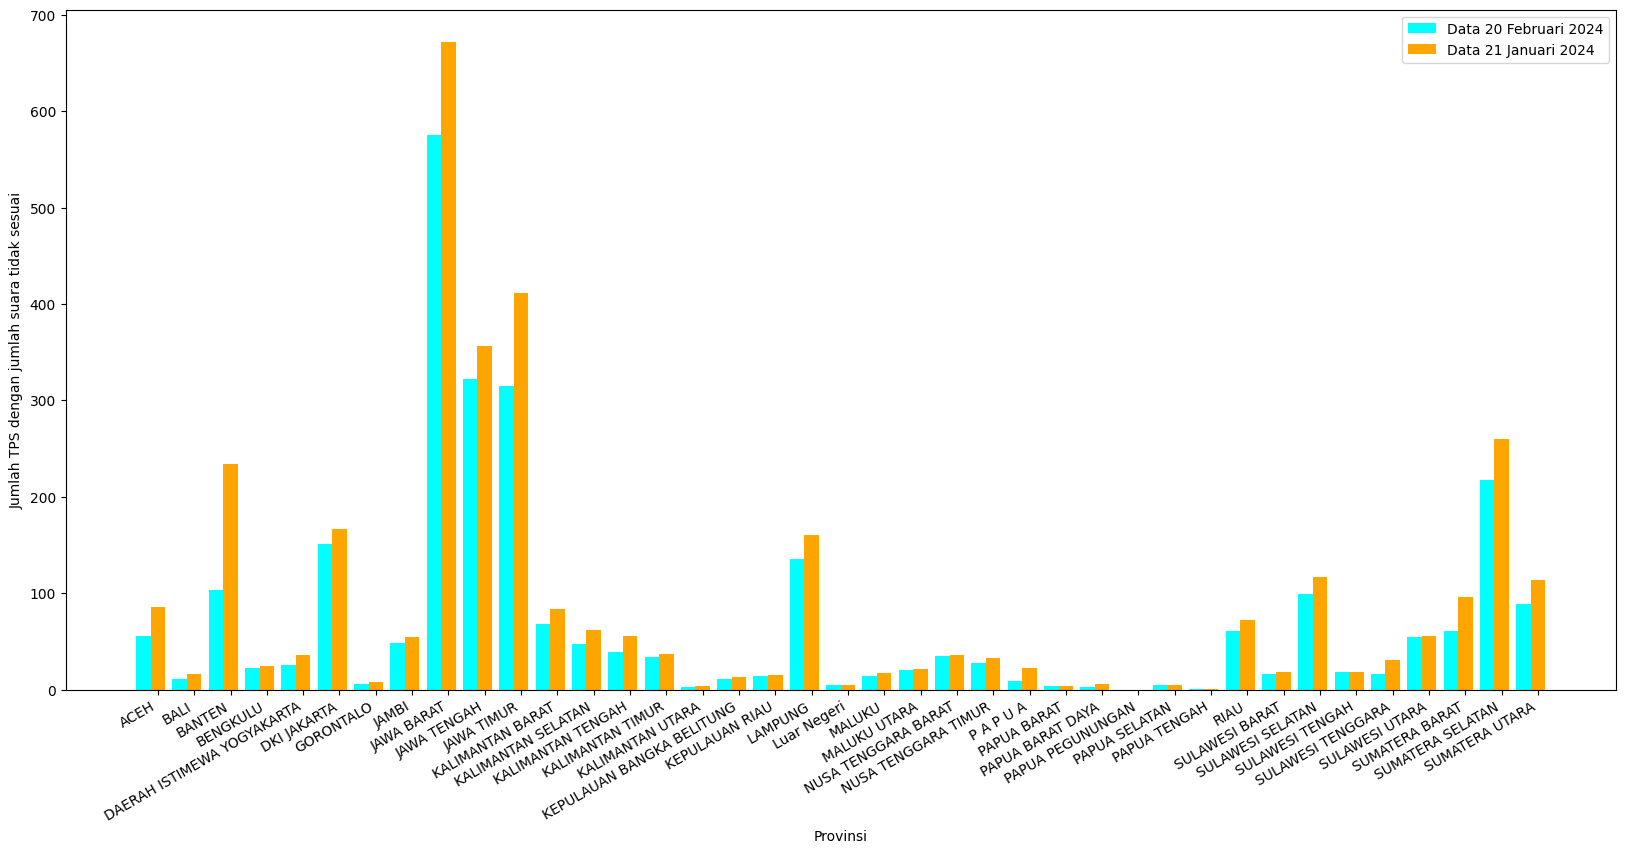

In [11]:
data_before = data_18_df[data_18_df['is_count_not_match'] == True]
data_after = data_20_df[data_20_df['is_count_not_match'] == True]

province_list = [provinces[key] for key in provinces]
y_before = [len(data_before[data_before['province'] == province]) for province in province_list]
y_after = [len(data_after[data_after['province'] == province]) for province in province_list]
x = np.arange(len(province_list))

fig, ax = plt.subplots(1, figsize = (20, 10))
fig.autofmt_xdate()
plt.bar(x-0.4, y_before, 0.4, color='cyan') 
plt.bar(x, y_after, 0.4, color='orange') 
plt.xticks(x, province_list) 
plt.xlabel("Provinsi") 
plt.ylabel("Jumlah TPS dengan jumlah suara tidak sesuai") 
plt.legend(["Data 20 Februari 2024", "Data 21 Januari 2024"]) 
plt.show() 

In [12]:
print("Contoh TPS dengan jumlah suara TIDAK SAMA dengan jumlah suara sah + jumlah suara tidak sah")
data_20_df[data_20_df['is_count_not_match'] == True]

Contoh TPS dengan jumlah suara TIDAK SAMA dengan jumlah suara sah + jumlah suara tidak sah


,url,paslon_1,paslon_2,paslon_3,suara_sah,suara_total,pemilih_dpt_j,pemilih_dpt_l,pemilih_dpt_p,pengguna_dpt_j,...,pengguna_total_p,pengguna_non_dpt_j,pengguna_non_dpt_l,pengguna_non_dpt_p,status_suara,status_admin,is_data_inputted,is_greater_than_dpt,is_count_not_match,province
2033,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1106/110609/1106092012/1106092012018,150.0,52.0,16.0,258.0,220.0,300.0,151.0,149.0,212.0,...,117.0,8.0,4.0,4.0,True,True,True,False,True,ACEH
2080,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1106/110605/1106052018/1106052018001,144.0,13.0,0.0,157.0,10.0,163.0,75.0,88.0,152.0,...,87.0,2.0,2.0,0.0,True,True,True,False,True,ACEH
2197,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1106/110604/1106042038/1106042038001,244.0,7.0,3.0,554.0,154.0,170.0,76.0,94.0,152.0,...,80.0,0.0,0.0,0.0,True,True,True,False,True,ACEH
2228,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1106/110604/1106042042/1106042042001,59.0,43.0,2.0,205.0,212.0,247.0,500.0,517.0,206.0,...,113.0,0.0,0.0,0.0,True,True,True,False,True,ACEH
2236,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1106/110604/1106042045/1106042045002,171.0,17.0,4.0,188.0,183.0,208.0,104.0,104.0,189.0,...,101.0,0.0,0.0,0.0,True,True,True,True,True,ACEH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818202,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1208/120814/1208142004/1208142004002,1.0,118.0,46.0,165.0,172.0,260.0,139.0,121.0,171.0,...,79.0,840.0,0.0,4.0,True,True,True,False,True,SUMATERA UTARA
820386,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1203/120330/1203302003/1203302003001,56.0,83.0,88.0,488.0,688.0,152.0,72.0,80.0,124.0,...,62.0,0.0,0.0,0.0,True,True,True,False,True,SUMATERA UTARA
821999,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1202/120202/1202022010/1202022010002,2.0,244.0,38.0,689.0,799.0,225.0,103.0,122.0,190.0,...,106.0,0.0,0.0,0.0,True,True,True,False,True,SUMATERA UTARA
822815,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/12/1212/121204/1212041009/1212041009012,1.0,150.0,64.0,219.0,0.0,251.0,127.0,124.0,208.0,...,107.0,6.0,3.0,3.0,True,True,True,False,True,SUMATERA UTARA


# Pertambahan paslon 2

In [13]:
df_before = data_18_df[['url', 'province', 'paslon_2', 'is_data_inputted']].copy()
df_after = data_20_df[['paslon_2']].copy().rename(columns={'paslon_2': 'paslon_2_baru'})

df_combine = pd.concat([df_before, df_after], axis=1)

def calculate_changes(x, key='paslon_1'):
    return x[f'{key}_baru'] - x[key]

df_combine['count_changes'] = df_combine.apply(lambda x: calculate_changes(x, 'paslon_2'), axis=1)
df_combine[df_combine['count_changes'] > 0].sort_values('count_changes', ascending=False)

,url,province,paslon_2,is_data_inputted,paslon_2_baru,count_changes
593103,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/99/9949/994901/9949010001/9949010001011,Luar Negeri,860.0,True,1860.0,1000.0
134960,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3204/320435/3204352010/3204352010002,JAWA BARAT,148.0,True,345.0,197.0
202816,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3215/321517/3215172002/3215172002015,JAWA BARAT,6.0,True,176.0,170.0
135741,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3204/320428/3204282003/3204282003008,JAWA BARAT,5.0,True,169.0,164.0
470536,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/35/3514/351412/3514122012/3514122012009,JAWA TIMUR,3.0,True,163.0,160.0
...,...,...,...,...,...,...
58056,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/36/3603/360315/3603152008/3603152008004,BANTEN,95.0,True,96.0,1.0
542564,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/62/6211/621101/6211012005/6211012005004,KALIMANTAN TENGAH,125.0,True,126.0,1.0
371383,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/33/3328/332815/3328152014/3328152014013,JAWA TENGAH,86.0,True,87.0,1.0
122289,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/15/1503/150301/1503012001/1503012001002,JAMBI,205.0,True,206.0,1.0


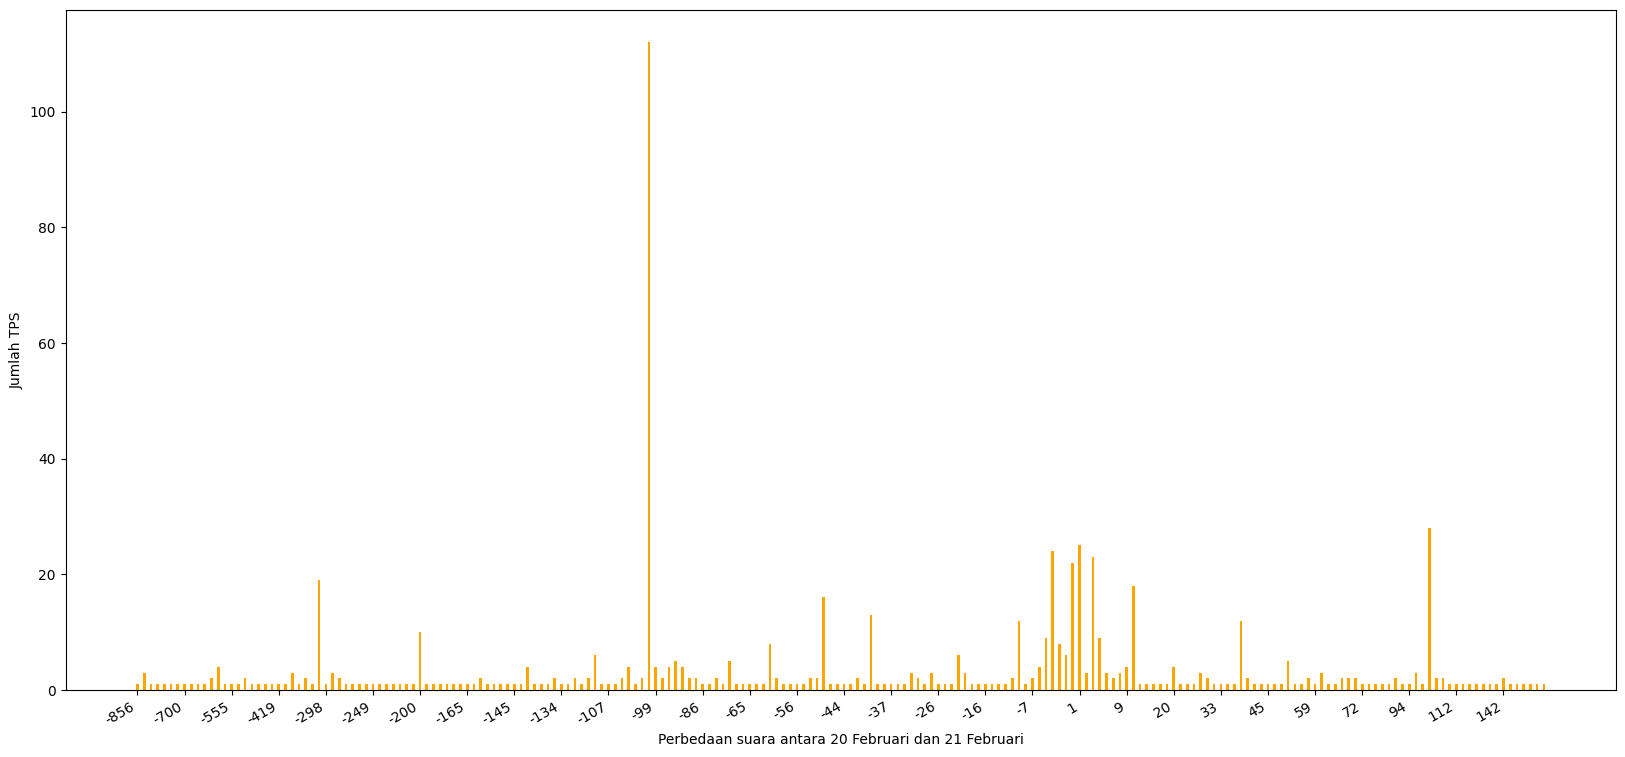

In [14]:
import math
unique_count_changes = [int(x) for x in df_combine['count_changes'].unique() if not math.isnan(x) and x != 0]
unique_count_changes.sort()

y = [len(df_combine[df_combine['count_changes'] == count_change]) for count_change in unique_count_changes]
x = np.arange(len(unique_count_changes))

fig, ax = plt.subplots(1, figsize = (20, 10))
fig.autofmt_xdate()
plt.bar(x, y, 0.4, color='orange') 
plt.xticks(x, unique_count_changes) 
plt.xlabel("Perbedaan suara antara 20 Februari dan 21 Februari") 
plt.ylabel("Jumlah TPS") 
plt.locator_params(axis='x', nbins=30)
plt.show() 

In [15]:
df_combine[df_combine['count_changes'] == 100]

,url,province,paslon_2,is_data_inputted,paslon_2_baru,count_changes
4340,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1116/111608/1116082015/1116082015003,ACEH,100.0,True,200.0,100.0
63717,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/17/1703/170313/1703132019/1703132019001,BENGKULU,52.0,True,152.0,100.0
150759,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3201/320113/3201132009/3201132009063,JAWA BARAT,22.0,True,122.0,100.0
150833,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3201/320113/3201132002/3201132002014,JAWA BARAT,41.0,True,141.0,100.0
152067,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3201/320115/3201152001/3201152001012,JAWA BARAT,49.0,True,149.0,100.0
159878,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3201/320112/3201122008/3201122008004,JAWA BARAT,80.0,True,180.0,100.0
160411,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3201/320114/3201142005/3201142005016,JAWA BARAT,44.0,True,144.0,100.0
166622,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3207/320703/3207032006/3207032006003,JAWA BARAT,123.0,True,223.0,100.0
166684,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3207/320703/3207032004/3207032004004,JAWA BARAT,108.0,True,208.0,100.0
197022,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3212/321207/3212072007/3212072007011,JAWA BARAT,56.0,True,156.0,100.0


# Pertambahan paslon 1

In [16]:
df_before = data_18_df[['url', 'province', 'paslon_1', 'is_data_inputted']].copy()
df_after = data_20_df[['paslon_1']].copy().rename(columns={'paslon_1': 'paslon_1_baru'})

df_combine = pd.concat([df_before, df_after], axis=1)

df_combine['count_changes'] = df_combine.apply(lambda x: calculate_changes(x, 'paslon_1'), axis=1)
df_combine[df_combine['count_changes'] > 0].sort_values('count_changes', ascending=False)

,url,province,paslon_1,is_data_inputted,paslon_1_baru,count_changes
429102,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/35/3578/357813/3578131004/3578131004020,JAWA TIMUR,35.0,True,350.0,315.0
196632,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3212/321226/3212262002/3212262002017,JAWA BARAT,10.0,True,210.0,200.0
199538,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3215/321526/3215261001/3215261001030,JAWA BARAT,19.0,True,175.0,156.0
218361,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3275/327512/3275121002/3275121002045,JAWA BARAT,0.0,True,110.0,110.0
741100,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/13/1307/130712/1307122001/1307122001033,SUMATERA BARAT,78.0,True,178.0,100.0
...,...,...,...,...,...,...
166330,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3207/320701/3207011007/3207011007005,JAWA BARAT,52.0,True,53.0,1.0
162176,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3201/320110/3201102001/3201102001009,JAWA BARAT,72.0,True,73.0,1.0
160117,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3201/320132/3201322006/3201322006034,JAWA BARAT,102.0,True,103.0,1.0
580110,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/18/1807/180719/1807192005/1807192005013,LAMPUNG,22.0,True,23.0,1.0


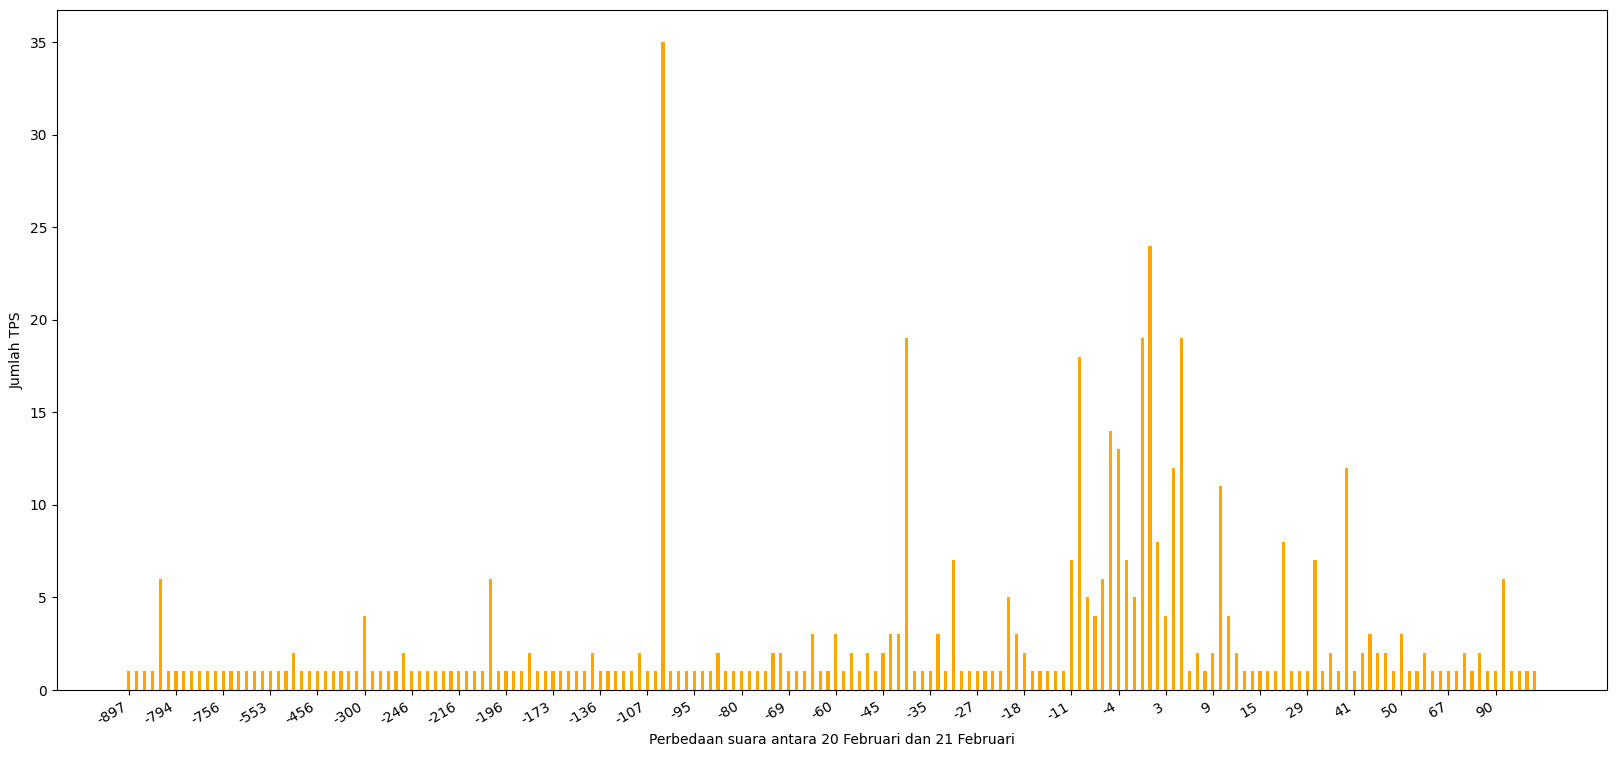

In [17]:
import math
unique_count_changes = [int(x) for x in df_combine['count_changes'].unique() if not math.isnan(x) and x != 0]
unique_count_changes.sort()

y = [len(df_combine[df_combine['count_changes'] == count_change]) for count_change in unique_count_changes]
x = np.arange(len(unique_count_changes))

fig, ax = plt.subplots(1, figsize = (20, 10))
fig.autofmt_xdate()
plt.bar(x, y, 0.4, color='orange') 
plt.xticks(x, unique_count_changes) 
plt.xlabel("Perbedaan suara antara 20 Februari dan 21 Februari") 
plt.ylabel("Jumlah TPS") 
plt.locator_params(axis='x', nbins=30)
plt.show() 

In [18]:
df_combine[df_combine['count_changes'] == 100]

,url,province,paslon_1,is_data_inputted,paslon_1_baru,count_changes
134960,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3204/320435/3204352010/3204352010002,JAWA BARAT,39.0,True,139.0,100.0
196636,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3212/321226/3212262002/3212262002021,JAWA BARAT,11.0,True,111.0,100.0
364973,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/33/3314/331416/3314162008/3314162008007,JAWA TENGAH,23.0,True,123.0,100.0
603118,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/82/8202/820209/8202092003/8202092003002,MALUKU UTARA,12.0,True,112.0,100.0
726678,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/71/7110/711005/7110052005/7110052005003,SULAWESI UTARA,29.0,True,129.0,100.0
741100,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/13/1307/130712/1307122001/1307122001033,SUMATERA BARAT,78.0,True,178.0,100.0


# Pertambahan paslon 3

In [19]:
df_before = data_18_df[['url', 'province', 'paslon_3', 'is_data_inputted']].copy()
df_after = data_20_df[['paslon_3']].copy().rename(columns={'paslon_3': 'paslon_3_baru'})

df_combine = pd.concat([df_before, df_after], axis=1)

df_combine['count_changes'] = df_combine.apply(lambda x: calculate_changes(x, 'paslon_3'), axis=1)
df_combine[df_combine['count_changes'] > 0].sort_values('count_changes', ascending=False)

,url,province,paslon_3,is_data_inputted,paslon_3_baru,count_changes
3718,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/11/1110/111012/1110122006/1110122006002,ACEH,5.0,True,550.0,545.0
220426,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3271/327103/3271031002/3271031002017,JAWA BARAT,12.0,True,320.0,308.0
310056,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/33/3313/331314/3313142006/3313142006016,JAWA TENGAH,23.0,True,327.0,304.0
191956,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3212/321223/3212232007/3212232007014,JAWA BARAT,40.0,True,342.0,302.0
199538,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3215/321526/3215261001/3215261001030,JAWA BARAT,45.0,True,180.0,135.0
...,...,...,...,...,...,...
208002,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3273/327325/3273251003/3273251003017,JAWA BARAT,2.0,True,3.0,1.0
64211,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/17/1704/170413/1704132003/1704132003001,BENGKULU,21.0,True,22.0,1.0
620146,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/52/5204/520417/5204172001/5204172001001,NUSA TENGGARA BARAT,18.0,True,19.0,1.0
177759,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3209/320926/3209262004/3209262004013,JAWA BARAT,22.0,True,23.0,1.0


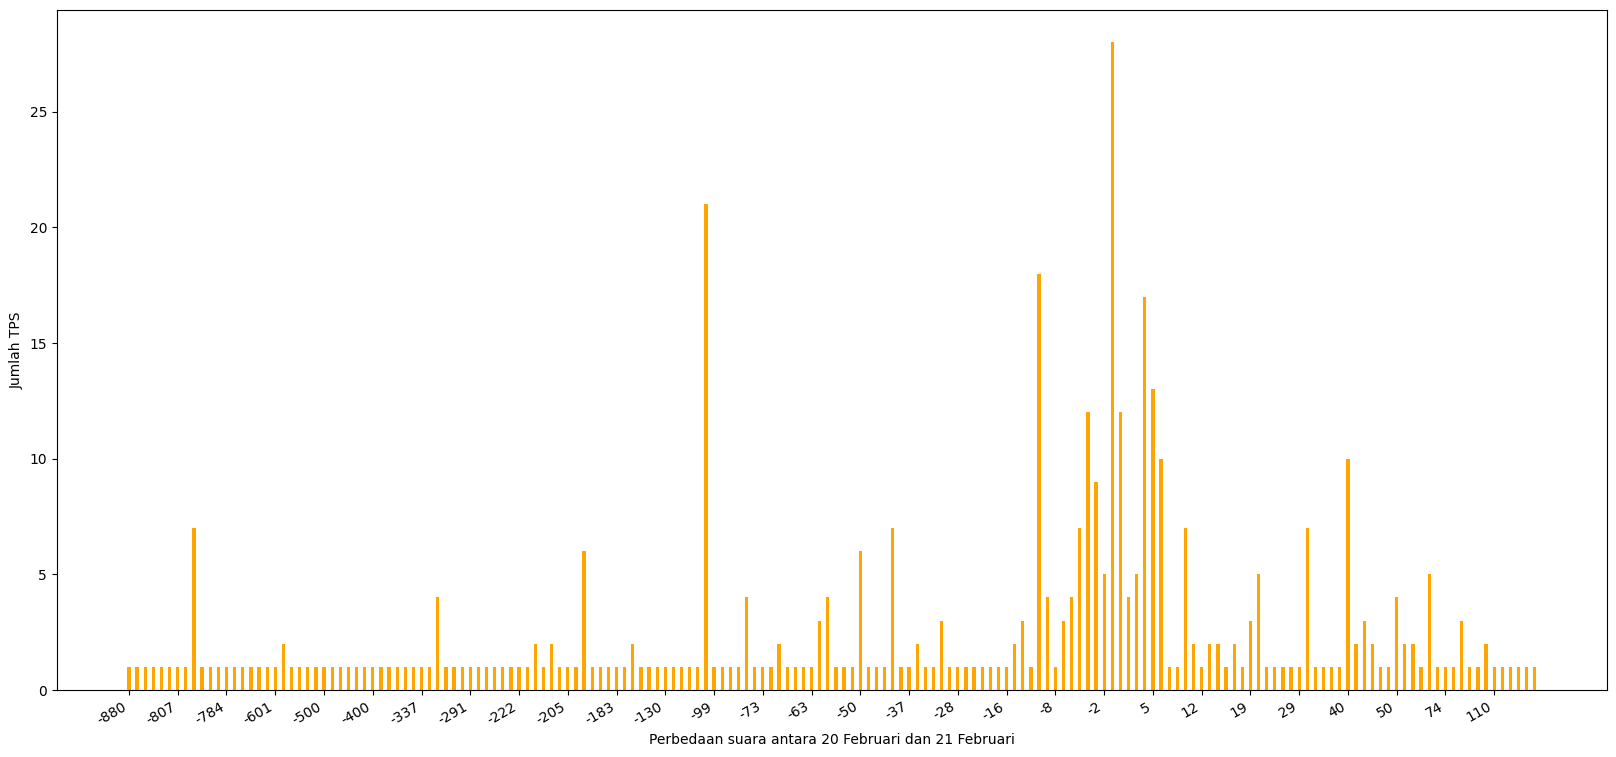

In [20]:
import math
unique_count_changes = [int(x) for x in df_combine['count_changes'].unique() if not math.isnan(x) and x != 0]
unique_count_changes.sort()

y = [len(df_combine[df_combine['count_changes'] == count_change]) for count_change in unique_count_changes]
x = np.arange(len(unique_count_changes))

fig, ax = plt.subplots(1, figsize = (20, 10))
fig.autofmt_xdate()
plt.bar(x, y, 0.4, color='orange') 
plt.xticks(x, unique_count_changes) 
plt.xlabel("Perbedaan suara antara 20 Februari dan 21 Februari") 
plt.ylabel("Jumlah TPS") 
plt.locator_params(axis='x', nbins=30)
plt.show() 

In [21]:
df_combine[df_combine['count_changes'] == 100]

,url,province,paslon_3,is_data_inputted,paslon_3_baru,count_changes
183886,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/32/3205/320523/3205232011/3205232011017,JAWA BARAT,10.0,True,110.0,100.0
300123,https://pemilu2024.kpu.go.id/pilpres/hitung-suara/33/3315/331508/3315082007/3315082007003,JAWA TENGAH,11.0,True,111.0,100.0
